In [1]:
using Distributions 
using IntervalSets
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Random123
using HCubature
using HDF5

using KDTree
using BAT
# using BATPar

using LaTeXStrings

In [2]:
import PyPlot

plt = PyPlot

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc("text", usetex=true)

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);
# colors = vcat([0 0 0 0.1], plt.cm.Blues(range(0, stop=1, length=10))[3:end,:])

In [3]:
# prior = NamedTupleDist(a = [[1.0 .. 2.0 for i in 1:2]...],);
# outp = bat_read("../../MCMC_publication/Saved_samples/samples_2.hdf5")
# samples = varshape(prior).(outp);

In [4]:
g(x;) = 0.8*pdf.(Normal(-5,0.9), x)+1.2*pdf.(Normal(-1.0,0.4), x) + 0.8*pdf.(Normal(1.0,0.4), x) + 0.8*pdf.(Normal(5,0.9), x) # 2

likelihood = params -> LogDVal((log(g(params.a))))
prior = NamedTupleDist(a = -10. .. 10.);
posterior = PosteriorDensity(likelihood, prior);

samples, stats_tmp = bat_sample(posterior, (1000, 10), MetropolisHastings());

┌ Info: Initializing new RNG of type Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 10 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 10 chains, 5 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 10 chains, 10 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC tuning of 10 chains successful after 2 cycle(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:102


In [5]:
KDTree.evaluate_total_cost(data::Data) = KDTree.cost_f_1(data)

In [6]:
smpl = flatview(unshaped.(samples.v))
weights_LogLik = samples.logd
weights_Histogram = samples.weight;

data_kdtree = Data(smpl[:,1:5:end], weights_Histogram[1:5:end], weights_LogLik[1:5:end]);

In [7]:
cost_1 = KDTree.evaluate_total_cost(data_kdtree)
output_1 = KDTree.find_min_along_axis(data_kdtree, 1)

([-7.6307751774011, -7.311498207512337, -6.992221237623575, -6.672944267734812, -6.35366729784605, -6.034390327957286, -5.715113358068524, -5.395836388179761, -5.076559418290999, -4.757282448402236  …  5.140303618149405, 5.459580588038167, 5.77885755792693, 6.098134527815692, 6.417411497704455, 6.736688467593218, 7.055965437481981, 7.375242407370743, 7.694519377259506, 8.013796347148268], Any[Inf, Inf, 2.496023975120812e8, 2.4175521388899705e8, 2.3016085631650105e8, 2.1535065373771644e8, 2.0209983806297952e8, 1.823373000220953e8, 1.6003632301714942e8, 1.415121034061199e8  …  1.603725198603361e8, 1.8853664085168853e8, 2.0204505030846623e8, 2.2041278553945032e8, 2.3813188093025473e8, 2.4705668606028005e8, 2.512890786555862e8, Inf, Inf, Inf], 0.031872099929202986, 4.133319662760302e7)

In [8]:
data_kdtree_2 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .> output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .> output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .> output_1[3]]);
data_kdtree_3 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .< output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .< output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .< output_1[3]]);

In [9]:
cost_2 = KDTree.evaluate_total_cost(data_kdtree_2)
cost_3 = KDTree.evaluate_total_cost(data_kdtree_3)

output_2 = KDTree.find_min_along_axis(data_kdtree_2, 1)
output_3 = KDTree.find_min_along_axis(data_kdtree_3, 1)

([-7.6307751774011, -7.474914500062154, -7.319053822723209, -7.163193145384264, -7.007332468045319, -6.851471790706373, -6.695611113367428, -6.539750436028483, -6.383889758689538, -6.228029081350592  …  -1.3963480838432891, -1.2404874065043439, -1.0846267291653986, -0.9287660518264533, -0.7729053744875081, -0.6170446971485628, -0.46118401980961754, -0.3053233424706723, -0.149462665131727, 0.006398012207218251], Any[Inf, Inf, Inf, 2.1909391312460568e7, 2.1209859257278558e7, 2.112013627487457e7, 1.9848384408207767e7, 1.9272418699994404e7, 1.814957867852938e7, 1.7434089315588765e7  …  3.9233351503391135e6, 5.715446812465307e6, 7.626724172552008e6, 1.0448557990602922e7, 1.3560037493062744e7, 1.6711463240936697e7, 1.8915179127283037e7, 2.023610987286884e7, 2.1419080683659136e7, Inf], -2.7990941798937965, 1.3532722652722518e6)

In [10]:
data_kdtree_4 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .> output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .> output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .> output_3[3]]);
data_kdtree_5 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .< output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .< output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .< output_3[3]]);

In [11]:
cost_4 = KDTree.evaluate_total_cost(data_kdtree_4)
cost_5 = KDTree.evaluate_total_cost(data_kdtree_5)

output_4 = KDTree.find_min_along_axis(data_kdtree_4, 1)
output_5 = KDTree.find_min_along_axis(data_kdtree_5, 1)

([-7.6307751774011, -7.534050278272937, -7.437325379144773, -7.34060048001661, -7.243875580888447, -7.147150681760284, -7.05042578263212, -6.953700883503957, -6.856975984375794, -6.7602510852476305  …  -3.761779212274568, -3.6650543131464044, -3.5683294140182413, -3.471604514890078, -3.3748796157619148, -3.2781547166337512, -3.181429817505588, -3.0847049183774247, -2.9879800192492616, -2.891255120121098], Any[Inf, Inf, Inf, Inf, 901917.292055712, 891864.408743557, 850899.4094504784, 823791.8728645021, 816391.9484952183, 759350.0700246935  …  633248.5620614889, 696214.4827495097, 724813.9194297029, 763562.127874898, 788832.3549014275, 807940.7535811026, 836719.7715556788, 885028.3416050537, 920064.5413662707, Inf], -5.019202900940691, 159584.05158131407)

In [12]:
cost_array = [cost_1, output_1[4], output_3[4]+cost_2, output_2[4]+cost_5+cost_4]
cut_range = 0:1:3

0:1:3

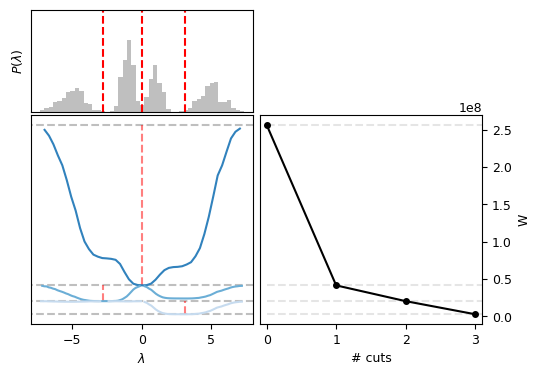

(0.0, 1300.0)

In [18]:
fig = plt.figure(figsize=(5.826767123287671, 4.07873698630137),)

fig.subplots_adjust(hspace=0.03, wspace=0.03)

ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1, yticklabels=[],  yticks=[], )
ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  )

ax2.hist(data_kdtree.samples[1,:], weights=data_kdtree.weights, bins=50, color="gray", alpha=0.5, label="Density");
ax2.vlines(output_1[3], 0, 1700, color="red", ls="--", label="Cut position")
ax2.vlines(output_3[3], 0, 1700, color="red", ls="--")
ax2.vlines(output_2[3], 0, 1700, color="red", ls="--")
ax2.get_xaxis().set_visible(false) 
# ax2.legend(loc="upper left", frameon=true, framealpha=0.9, ncol=1)
ax2.set_ylabel(L"P(\lambda)")

# ax1.plot(output_1[1], output_1[2], color="steelblue") #dodgerblue skyblue lightskyblue lightblue
# ax1.plot(output_2[1], cost_3 .+ output_2[2], color="lightskyblue")
# ax1.plot(output_3[1], cost_2 .+ output_3[2], color="lightskyblue")
# ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color="lightblue")
# ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color="lightblue")
# ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color="lightblue")

ax1.plot(output_1[1], output_1[2], color=PyPlot.ColorMap("tab20c").colors[1]) #dodgerblue skyblue lightskyblue lightblue
ax1.plot(output_2[1], cost_3 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_3[1], cost_2 .+ output_3[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[4])

ax1.hlines(output_3[4]+cost_2, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(output_2[4]+cost_5+cost_4, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(cost_1, -10,10, color="gray", ls="--", alpha=0.5 )
ax1.hlines(output_1[4], -10,10, color="gray", ls="--", alpha=0.5)

ax1.vlines(output_1[3], output_1[4], cost_1, color="red", alpha=0.5, ls="--")
ax1.vlines(output_3[3], output_3[4]+cost_2, output_1[4], color="red", alpha=0.5, ls="--")
ax1.vlines(output_2[3], output_2[4]+cost_5+cost_4, output_3[4]+cost_2, color="red", alpha=0.5, ls="--")
# ax2.vlines(output_3[3], 0, 700, color="red")
# ax2.vlines(output_2[3], 0, 700, color="red")

ax1.set_xlabel(L"\lambda")

ax3.plot(collect(cut_range), cost_array, color="black", "-o", ms=4, mfc="k")
ax3.yaxis.tick_right()
ax3.yaxis.set_ticks_position("right")
ax3.set_xlabel("# cuts")
ax3.set_ylabel("W")
ax3.yaxis.set_label_position("right")

ax3.hlines(output_3[4]+cost_2, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_2[4]+cost_5+cost_4, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(cost_1, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_1[4], 0,4, color="gray", ls="--", alpha=0.2)
ax3.set_xticks(collect(cut_range))
ax3.set_xlim(-0.1, 3.1)

ax2.set_xlim(-8., 8.)
ax1.set_xlim(-8., 8.)

ax2.set_ylim(0.0, 1300.)

# fig.savefig("../plots/fig-b.pdf", bbox_inches = "tight")